In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import itertools
from ast import literal_eval
import re

plt.style.use('ggplot')

In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('../scripts/'))
if module_path not in sys.path:
    sys.path.append(module_path) #"/Volumes/tuba/herpov/tcr-pmhc-sc-project/scripts/"
from D_plot_specificity_matrix_utils_intermediate import (epitope_sorter_index,
                                                          filtering,
                                                          peptides_per_gem,
                                                          peptide_per_clonotype_by_gem_size,
                                                          peptide_per_clonotype_by_umi_counts,
                                                          mhc_read_count_per_clonotype,
                                                          tcr_read_count_per_clonotype,
                                                          multiple_peptides_per_gem) #SpecificityMatrix

# Args

In [3]:
def assign_clonotype(tcr_df):
    clonotype_variables = ['cdr3_TRA','cdr3_TRB']
    tcr_df.loc[:, clonotype_variables] = tcr_df.loc[:, clonotype_variables].fillna('unknown')
    new_clonotype = tcr_df.groupby(clonotype_variables).gem.unique().to_frame()
    new_clonotype['n_gems'] = new_clonotype.gem.apply(len)
    new_clonotype.sort_values(by='n_gems', ascending=False, inplace=True)
    dct = new_clonotype.to_dict()['gem']
    for i, k in enumerate(dct.keys(), start=1): 
        dct[k] = i
    return tcr_df.set_index(clonotype_variables).index.map(dct)

In [4]:
def cdr3_lst_converter(x):
    #define format of datetime
    return x.replace("[","").replace("]","").replace("'","").split(" ")

def epitope_converter(x):
    #define format of datetime
    return x.replace("[","").replace("]","").replace("'","").split(" ")

def peptide_hla_converter(x):
    return re.findall("\w+\s{1}\w{1}\d+", x.replace("[","").replace("]","").replace("'",""))

In [5]:
converters={'peptide_HLA_lst': peptide_hla_converter, 'epitope_lst': epitope_converter, 'umi_count_lst_mhc': literal_eval,'cdr3_lst_TRA': cdr3_lst_converter}

In [6]:
EXP = 'exp3.2.2'

# Input

In [7]:
INPUT = "/Volumes/tuba/herpov/tcr-pmhc-sc-project/data/" + EXP + "_CAT_IONTORRENT_KMA_AKB/tables/tcr_barcode.cleaned.csv" #'tcr_barcode.cleaned.imputed.csv'

In [8]:
INPUT_IMPUT = 'tcr_barcode.cleaned.imputed.{}.csv'.format(EXP)
#INPUT_DISC = 'tcr_barcode.cleaned.imputed.nonimputed_discarded.csv'

# Output

# Load

In [9]:
df = pd.read_csv(INPUT, converters=converters) #, converters=converters

# Main

In [10]:
df['epitope_rank'] = epitope_sorter_index(df)

(credible_df, clonotype_fmt="ct", filtration="no_filtration", bc_threshold=1, tcr_threshold=1, exclude_clonotype_singlets=False, exclude_specificity_singlets=False, show=True, save_tuba=False, save_sund=False, save_report=False)

Filter

In [11]:
df = filtering(df, 2, 1, filtration='exclude_single-chain_TCRs')

UMI filtering 1166


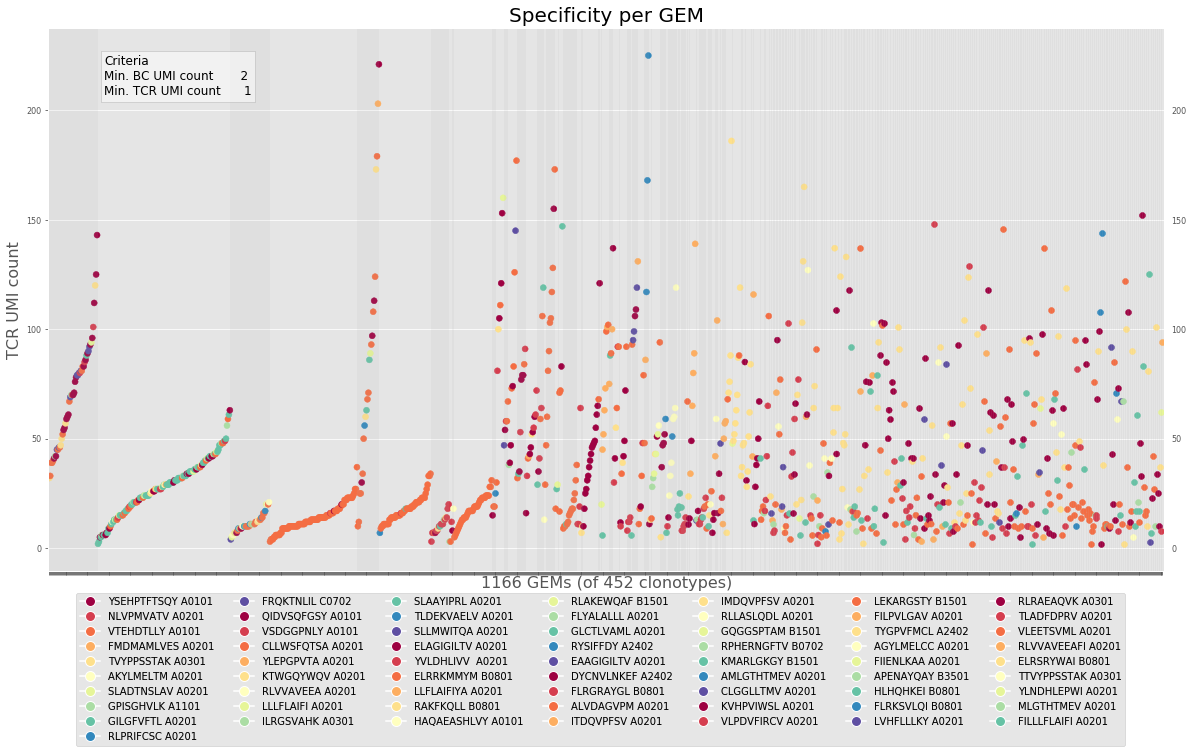

OBS! Figures are not saved!


In [12]:
tcr_read_count_per_clonotype(df, bc_threshold=2, tcr_threshold=1,show=True)

Concordance

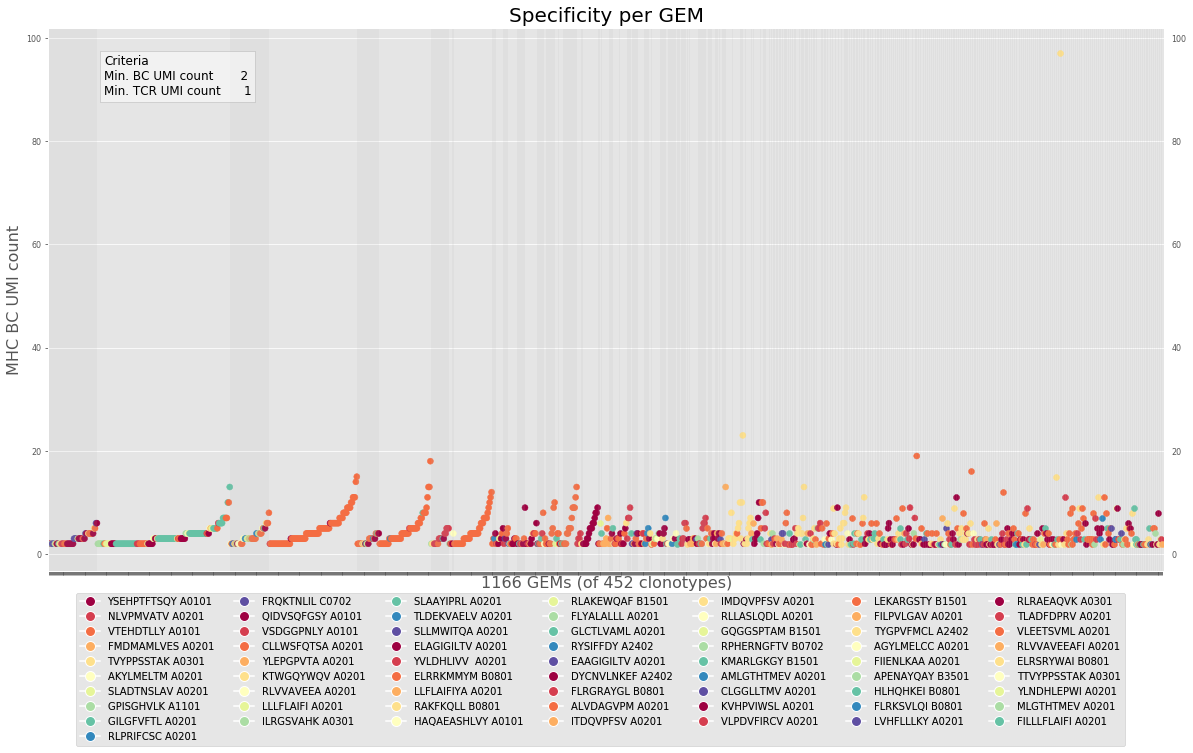

OBS! Figures are not saved!


In [13]:
mhc_read_count_per_clonotype(df, bc_threshold=2, tcr_threshold=1,show=True)

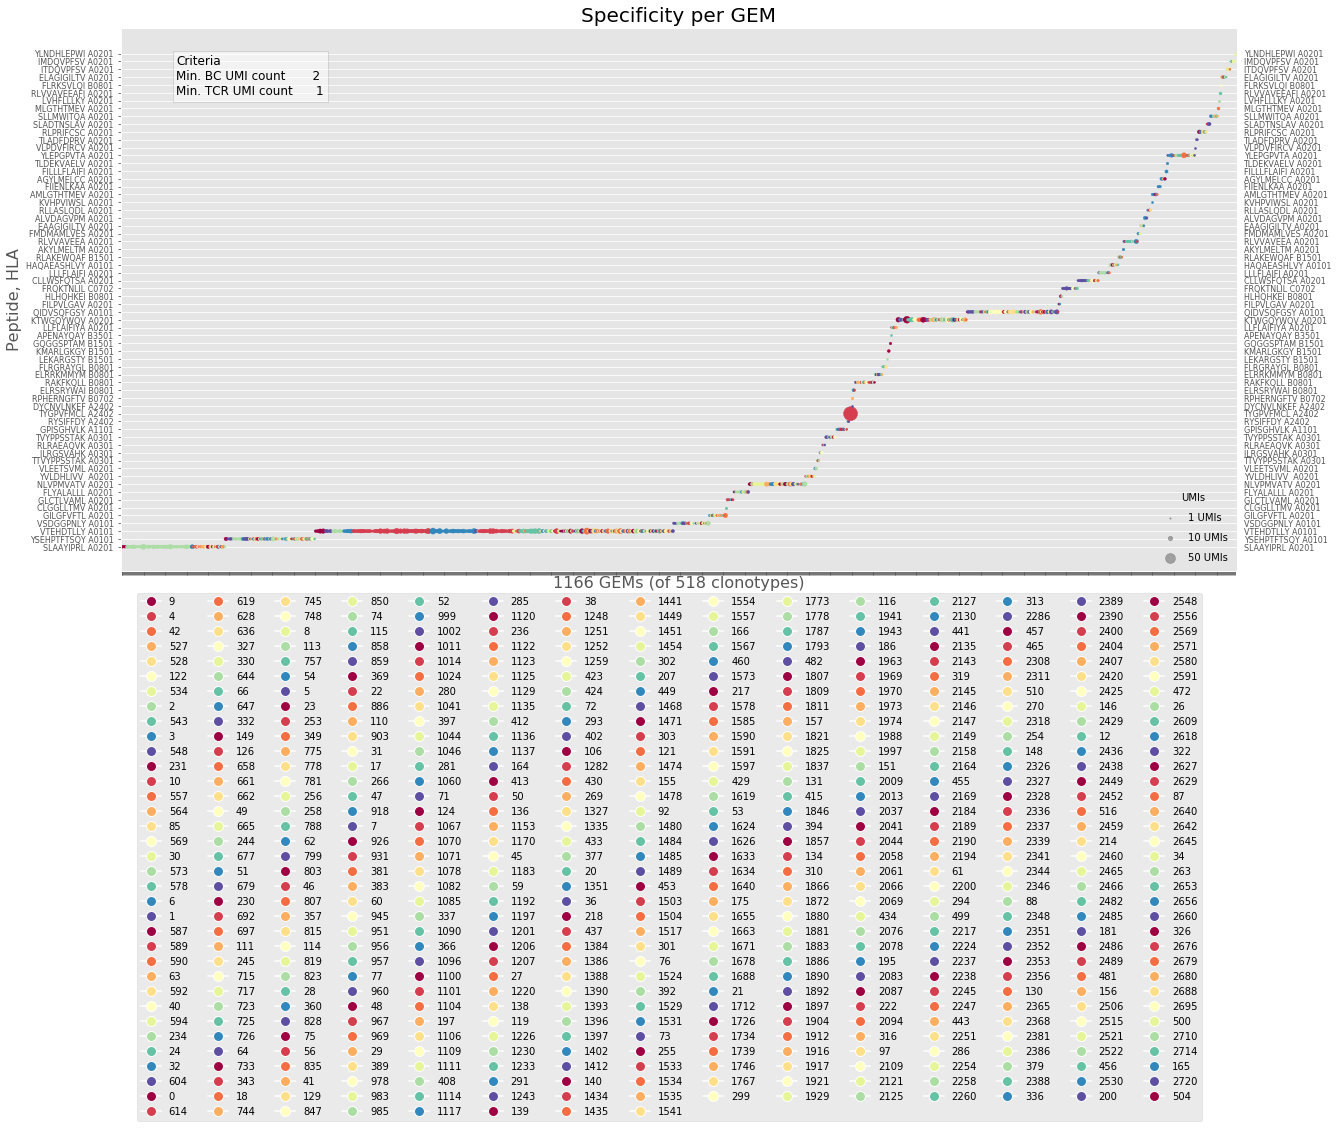

OBS! Figures are not saved!


In [14]:
peptides_per_gem(df, clonotype_fmt='num_clonotype', bc_threshold=2, tcr_threshold=1,show=True)

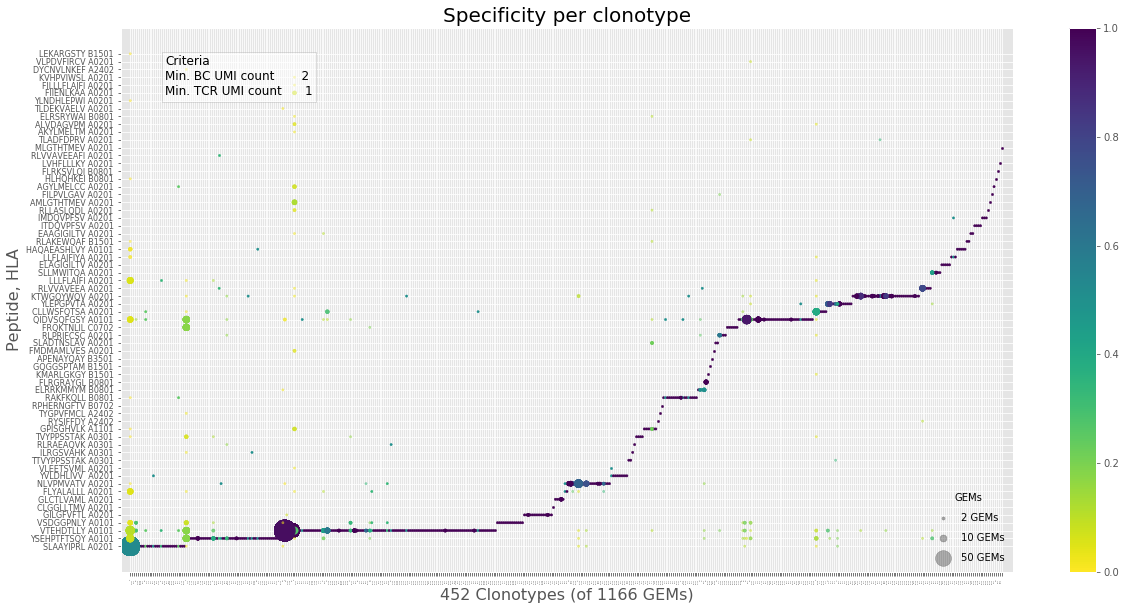

OBS! Figures are not saved!


In [15]:
peptide_per_clonotype_by_gem_size(df,
                                  bc_threshold=2, tcr_threshold=1,
                                  show=True) #"stats/{}/{}/".format(EXP, 'non-imputed_10x-clonotype')

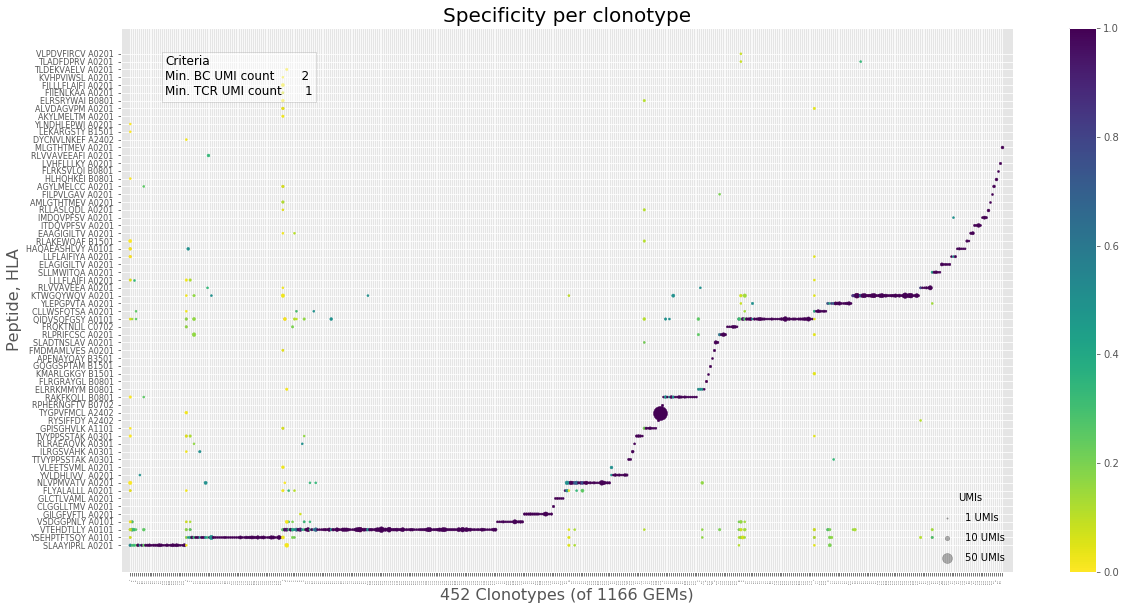

OBS! Figures are not saved!


In [16]:
peptide_per_clonotype_by_umi_counts(df,
                                  bc_threshold=2, tcr_threshold=1,
                                  show=True)

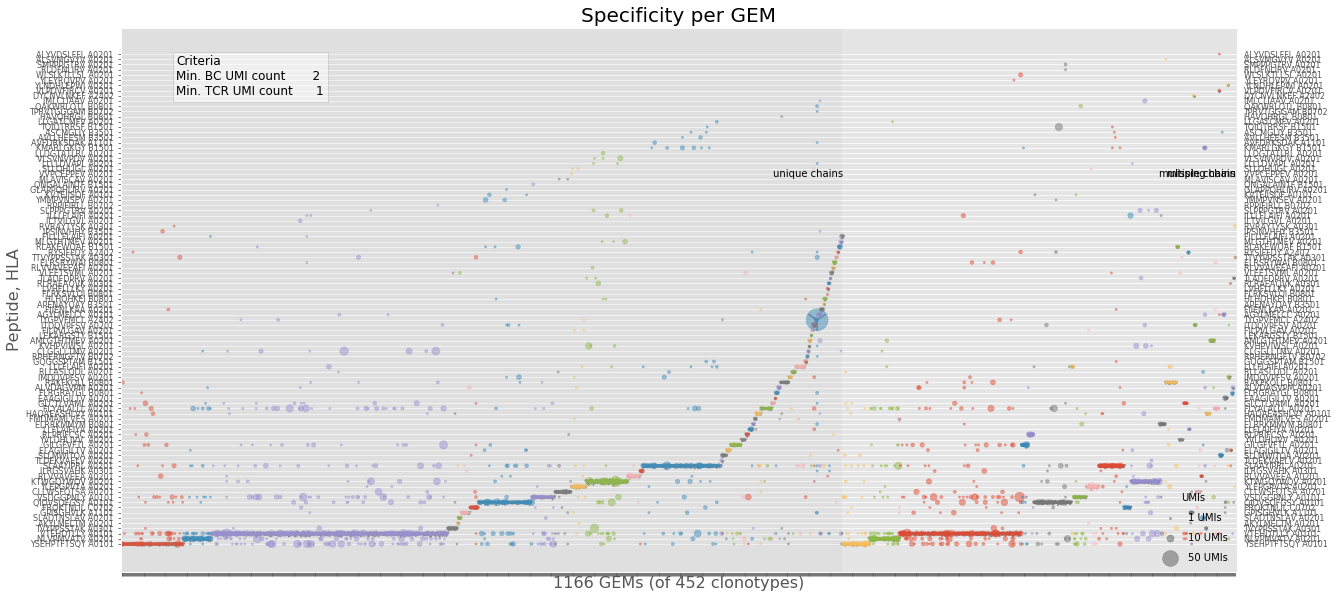

OBS! Figures are not saved!


In [17]:
multiple_peptides_per_gem(df,
                          bc_threshold=2, tcr_threshold=1,
                          show=True)